In [59]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [60]:
#Load and store the Signals into a pandas dataframe
Signal1 = pd.read_csv("signal1.csv",header=None)
Signal2 = pd.read_csv("signal2.csv",header=None)
Signal3 = pd.read_csv("signal3.csv",header=None)
Signal4 = pd.read_csv("signal4.csv",header=None)
Signal5 = pd.read_csv("signal5.csv",header=None)
Signal6 = pd.read_csv("signal6.csv",header=None)
Signal_Dataframe = pd.concat([Signal1,Signal2,Signal3,Signal4,Signal5,Signal6],axis=1,ignore_index=True)

In [61]:
#Load and store the jumps into a pandas dataframe
Jump1 = pd.read_csv("jump1.csv",header=None)
Jump2 = pd.read_csv("jump2.csv",header=None)
Jump3 = pd.read_csv("jump3.csv",header=None)
Jump4 = pd.read_csv("jump4.csv",header=None)
Jump5 = pd.read_csv("jump5.csv",header=None)
Jump6 = pd.read_csv("jump6.csv",header=None)
Jump_Dataframe = pd.concat([Jump1,Jump2,Jump3,Jump4,Jump5,Jump6],axis=1,ignore_index=True)

In [62]:
#data preprocessing
Signal_Dataframe.isnull().sum(),Jump_Dataframe.isnull().sum()

Signal_Dataframe = Signal_Dataframe.dropna()
Jump_Dataframe = Jump_Dataframe.dropna()

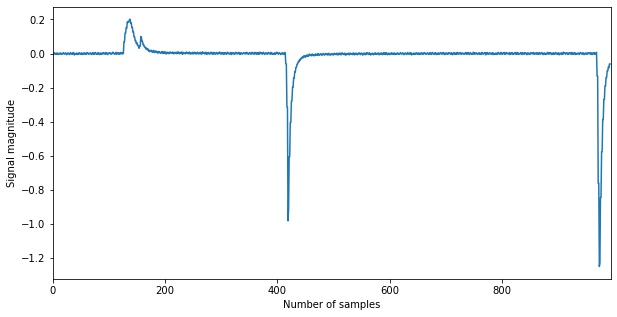

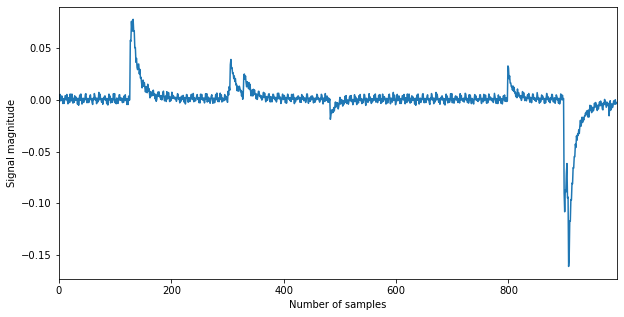

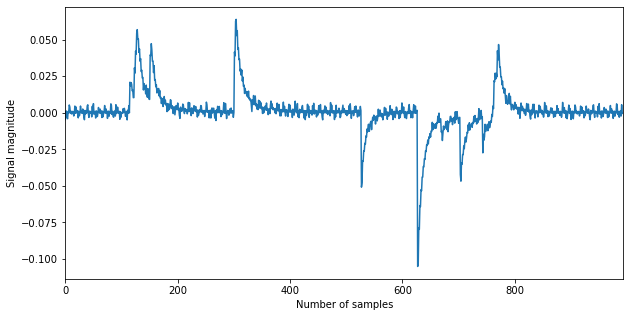

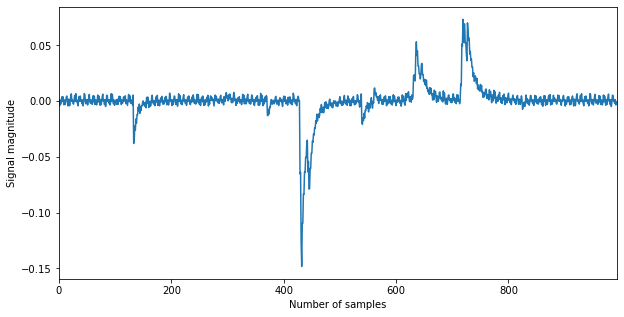

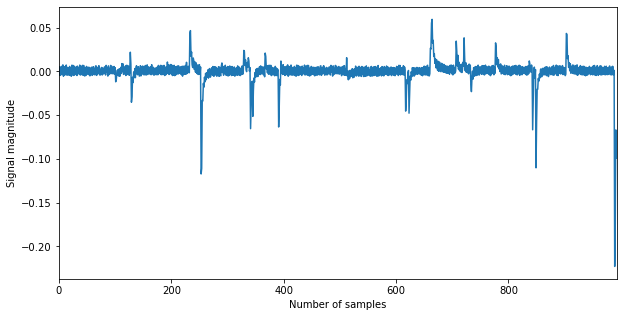

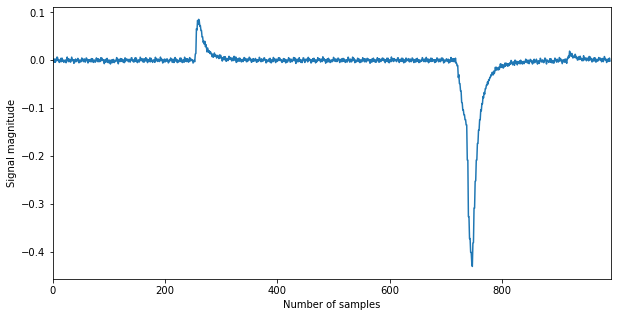

In [63]:
figs = {}
axs = {}
for i in range(Signal_Dataframe.shape[1]):
    figs[i] = plt.figure(figsize=(10,5))
    axs[i] =figs[i].add_subplot(111)
    axs[i].plot(Signal_Dataframe[i])  
    axs[i].set_xlim(0,Signal_Dataframe[i].shape[0])
    axs[i].set_ylabel('Signal magnitude')
    axs[i].set_xlabel('Number of samples')   

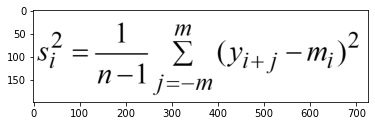

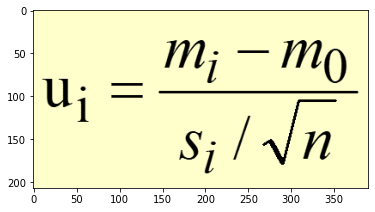

In [64]:
image = mpimg.imread("variancecomparison.png")
plt.imshow(image)
plt.show()
image = mpimg.imread("meancomparison.png")
plt.imshow(image)
plt.show()

In [65]:
def anomaly_detection(signal,threshold,windowsize):
    X = signal[:60]
    mean_flux0 = np.mean(X)
    #decision_mean = []
    decision_mean = np.zeros(signal.shape[0])
    time = []
    mean_comparison = []
    for window in range(windowsize,signal.shape[0]+1):
        a = (np.mean(signal[window-window_size:window]) - mean_flux0)
        b = (np.std(signal[window-window_size:window]))/(np.sqrt(window_size))
        u = a/b
        mean_comparison.append(u)
        if ((u >= threshold) | (u <= -threshold)): #threshold
            decision_mean[window-window_size] = 1
            time.append(window - int(window_size/2)) 
        else:
            decision_mean[window-window_size] = 0
            
    return decision_mean, mean_comparison,time

In [66]:
signal = Signal_Dataframe[0]  # 6 signals (0...5)
threshold = 3
window_size = 20
decision_mean,mean_comparison,time = anomaly_detection(signal,threshold,window_size)

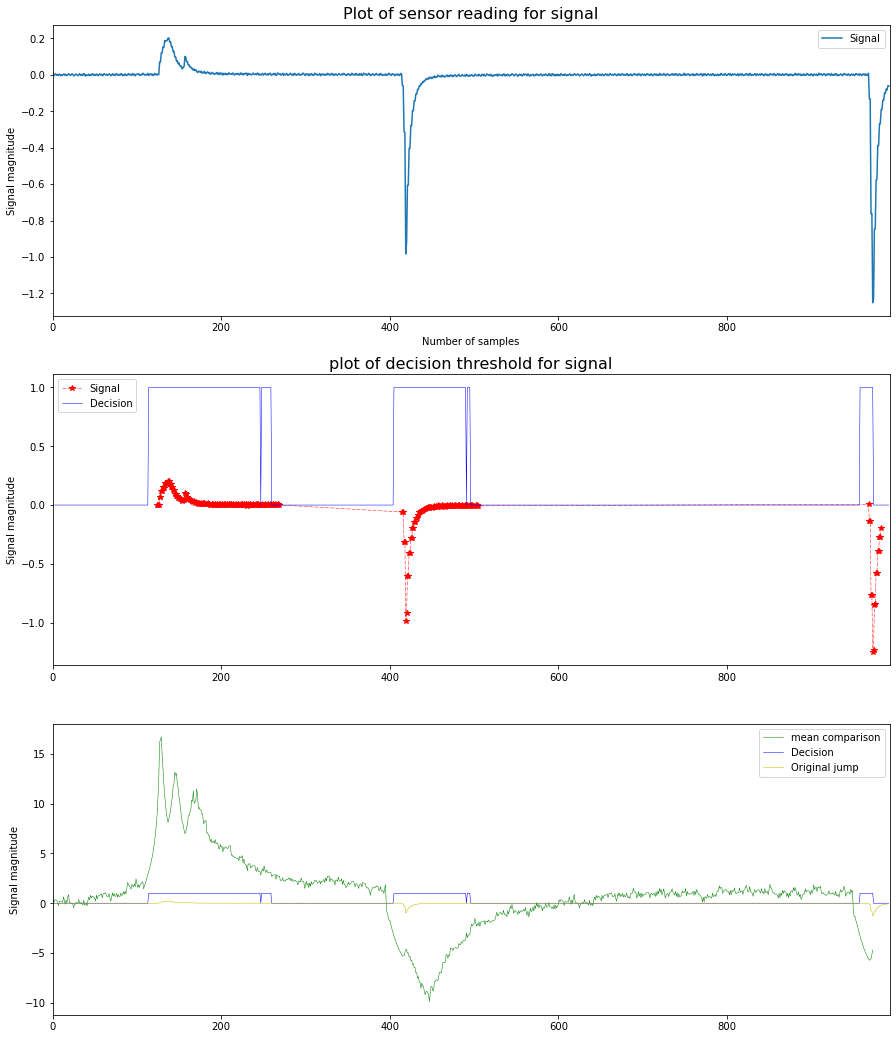

In [67]:
fig,axs = plt.subplots(3,1,figsize=(15,10))
axs = axs.reshape(-1)
axs[0].plot(signal,label='Signal')
axs[0].set_xlim(0,signal.shape[0])
axs[0].set_xlabel('Number of samples')
axs[0].set_ylabel('Signal magnitude')
axs[0].legend(loc=0)
axs[0].set_title('Plot of sensor reading for signal', fontsize=16)

axs[1].plot(time,signal[time],'-.*',color='r',linewidth=0.5,label='Signal')
axs[1].plot(decision_mean,color='b',linewidth=0.5,label='Decision')
axs[1].set_xlim(0,signal.shape[0])
axs[1].set_ylabel('Signal magnitude')
axs[1].legend(loc=0)
axs[1].set_title('plot of decision threshold for signal', fontsize=16)

axs[2].plot(mean_comparison,color='g',linewidth=0.5,label='mean comparison')
axs[2].plot(decision_mean,color='b',linewidth=0.5,label='Decision')
axs[2].plot(signal,color='y',linewidth=0.5,label='Original jump')
axs[2].set_xlim(0,signal.shape[0])
axs[2].set_ylabel('Signal magnitude')
axs[2].legend(loc=0)
plt.subplots_adjust( top = 1.5 )
plt.show()


In [68]:
#implement testing algorithm using confusion matrix
from sklearn.metrics import confusion_matrix
decision_mean.shape, np.array(Jump_Dataframe[0]).shape
mcm = confusion_matrix(np.array(Jump_Dataframe[0]),decision_mean)
print(mcm)

[[723 139]
 [ 19 112]]


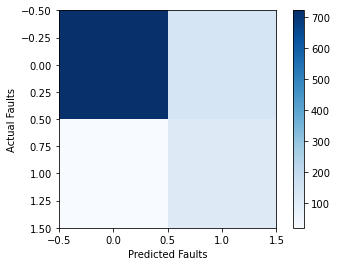

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted Faults")
plt.ylabel("Actual Faults")
plt.show()

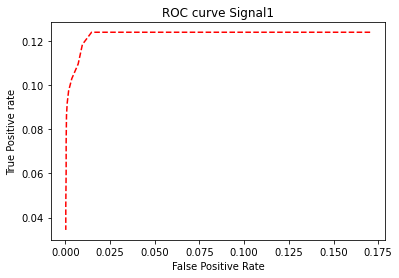

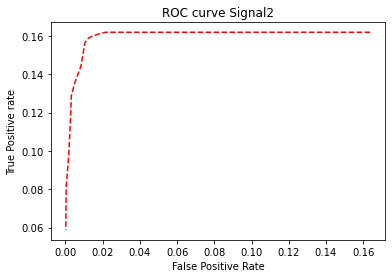

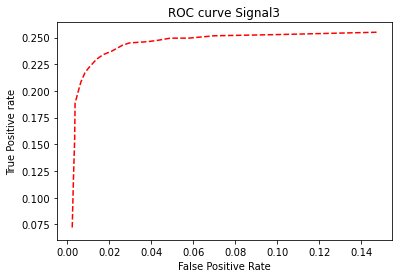

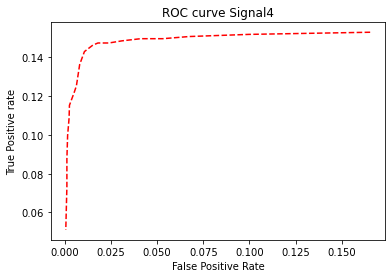

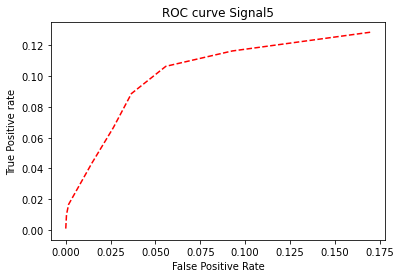

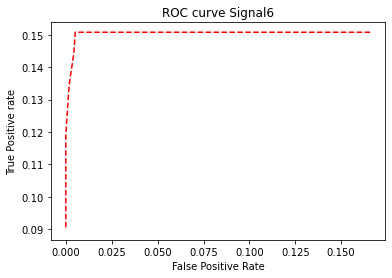

In [83]:
# Plot ROC Curve

A = 0
B = 0

for i in range(0,6):
    totL0 = len(Jump_Dataframe[i]) - np.count_nonzero(Jump_Dataframe[i]) #find number of zeros in Jump
    A += totL0
    totL1 = np.count_nonzero(Jump_Dataframe[i]) #find number of ones in Jump
    B += totL1
    
C = 0
D = 0

    
for i in range(0,6):
    Pd = []
    Pfa = []
    for y in np.arange(0,10,0.5):
        decision_mean,_,_ = anomaly_detection(Signal_Dataframe[i], y, 20)
        Truepositives = np.in1d(np.where(Jump_Dataframe[i] == 1) ,np.where(decision_mean == 1))        
        FalsePositve = np.in1d(np.where(Jump_Dataframe[i] == 0) ,np.where(decision_mean == 1))              
        Pd.append(np.count_nonzero(Truepositives)/B)        
        Pfa.append(np.count_nonzero(FalsePositve)/ A) 
    plt.plot(Pfa,Pd,'r--')
    plt.title('ROC curve Signal'+ str(i+1))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.show()
   
